Installing libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import os


LOADING THE CSV FILE

In [114]:
speech_df=pd.read_csv("E:/final year project/dataset/tess/speech_emotion_recognisition.csv")
speech_df = speech_df.drop(speech_df.columns[0], axis=1)
speech_df

,Emotion,Filename
0,Angry,OAF_back_angry.wav
1,Angry,OAF_bar_angry.wav
2,Angry,OAF_base_angry.wav
3,Angry,OAF_bath_angry.wav
4,Angry,OAF_bean_angry.wav
...,...,...
16795,Sad,YAF_witch_sad_augmented.wav
16796,Sad,YAF_yearn_sad_augmented.wav
16797,Sad,YAF_yes_sad_augmented.wav
16798,Sad,YAF_young_sad_augmented.wav


DATA ANALYSIS


COUNTING TOTAL DATA FOR EACH EMOTIONS

In [115]:
speech_df.Emotion.value_counts()

Emotion
Angry        2400
Disgust      2400
Fear         2400
Happy        2400
Neutral      2400
Surprised    2400
Sad          2400
Name: count, dtype: int64

In [116]:
# speech_df=speech_df[speech_df["Emotion"]!="Calm"]
# speech_df=speech_df[speech_df["Emotion"]!="Surprised"] #dropping calm and surprised column due to lack of data

In [117]:
speech_df.Emotion.value_counts()


Emotion
Angry        2400
Disgust      2400
Fear         2400
Happy        2400
Neutral      2400
Surprised    2400
Sad          2400
Name: count, dtype: int64

VALUE COUNT PLOT

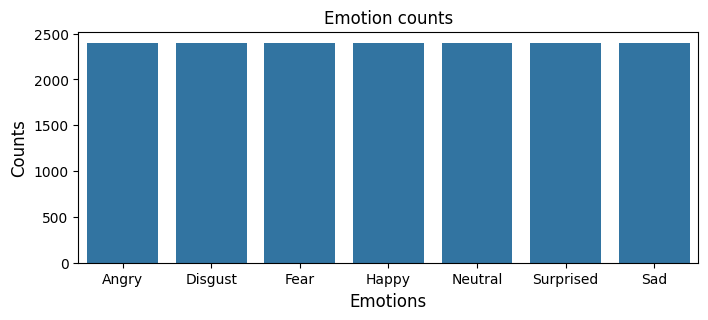

In [118]:
plt.figure(figsize=(8,3))
plt.title("Emotion counts")
sns.countplot(x="Emotion", data=speech_df)
plt.xlabel("Emotions",size=12)
plt.ylabel("Counts",size=12)
plt.show()


In [119]:
# def visualise_waveform(data,sample_rate,emotion):
    
#     plt.title(f"Waveform of {emotion}")
#     librosa.display.waveshow(y=data,sr=sample_rate)
#     plt.ylabel('Amplitude')
    

In [120]:
# emotions_list = speech_df['Emotion'].unique().tolist()
emotions_list=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']

emotions_list

['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']

In [121]:
random_filepaths=speech_df[speech_df['Emotion'].isin(emotions_list)].groupby('Emotion').sample(n=1,random_state=42)
print(random_filepaths)
filenames=random_filepaths['Filename'].to_list()
filenames
# selected_files=dict(zip(random_filepaths['Emotion'],random_filepaths['Filename']))
# print(selected_files)

         Emotion                        Filename
14037      Angry    OAF_fail_angry_augmented.wav
15708    Disgust   YAF_nag_disgust_augmented.wav
10214       Fear     YAF_came_fear_augmented.wav
14641      Happy     OAF_fit_happy_augmented.wav
10738    Neutral  YAF_road_neutral_augmented.wav
4080         Sad      OAF_late_sad_augmented.wav
2425   Surprised                  YAF_dab_ps.wav


['OAF_fail_angry_augmented.wav',
 'YAF_nag_disgust_augmented.wav',
 'YAF_came_fear_augmented.wav',
 'OAF_fit_happy_augmented.wav',
 'YAF_road_neutral_augmented.wav',
 'OAF_late_sad_augmented.wav',
 'YAF_dab_ps.wav']

In [122]:
dataset_path="E:/final year project/dataset/tess"

WAVEFORM PLOT

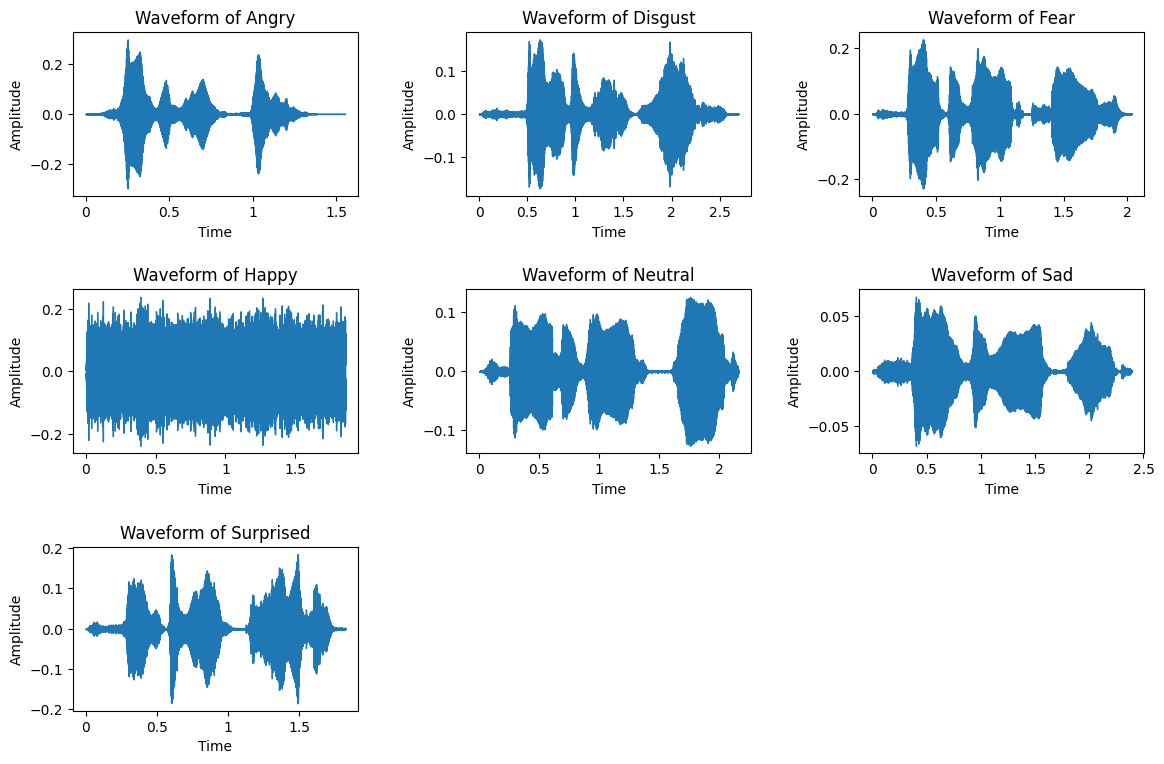

In [123]:

plt.figure(figsize=(12,8))
for i in range(7):
    data,sr=librosa.load(path=os.path.join(dataset_path,emotions_list[i],filenames[i]),sr=16000)
    plt.subplot(3,3,i+1)
    plt.title(f"Waveform of {emotions_list[i]}")
    librosa.display.waveshow(y=data,sr=sr)
    plt.ylabel('Amplitude')
plt.tight_layout(pad=2)
plt.show()

PLOTTING MELSPECTOGRAM

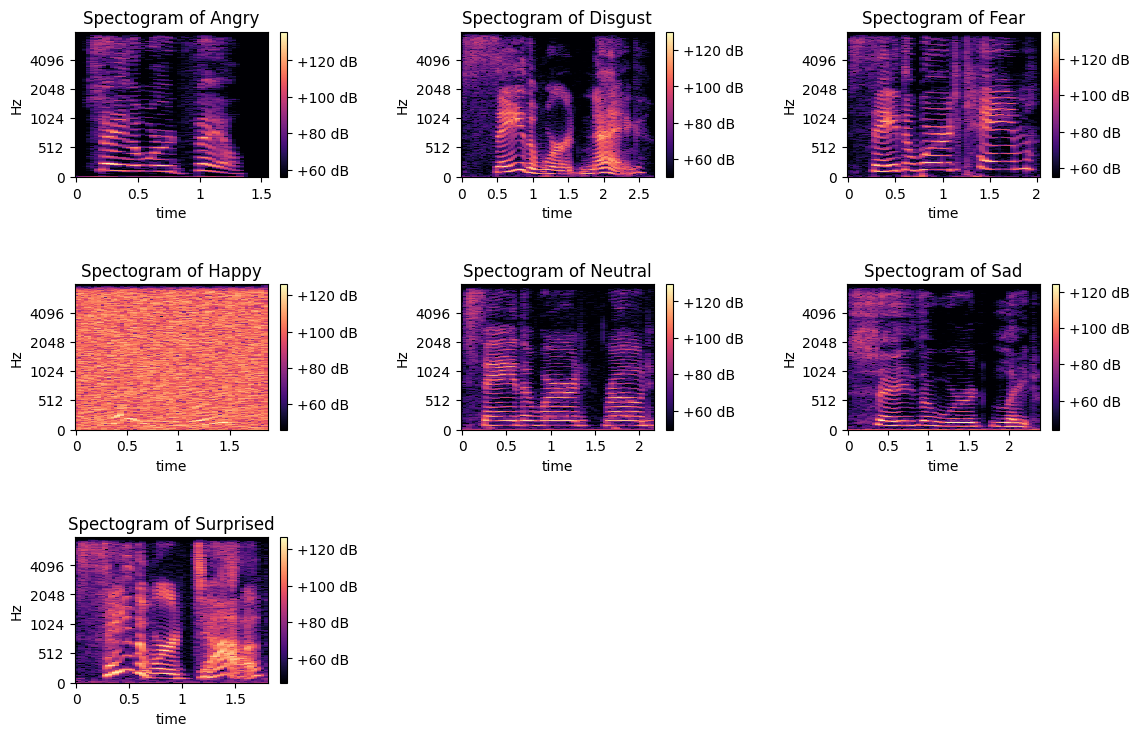

In [124]:
plt.figure(figsize=(12,8))
for i in range(len(emotions_list)):
    data,sr=librosa.load(path=os.path.join(dataset_path,emotions_list[i],filenames[i]),sr=16000)
    stft=librosa.stft(data)
    db=librosa.amplitude_to_db(abs(stft),ref=np.min)
    plt.subplot(3,3,i+1)
    plt.title(f"Spectogram of {emotions_list[i]}")
    librosa.display.specshow(data=db,sr=sr,x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')

    plt.xlabel('time')
plt.tight_layout(pad=3)
plt.show()


PLOTTING MFCC

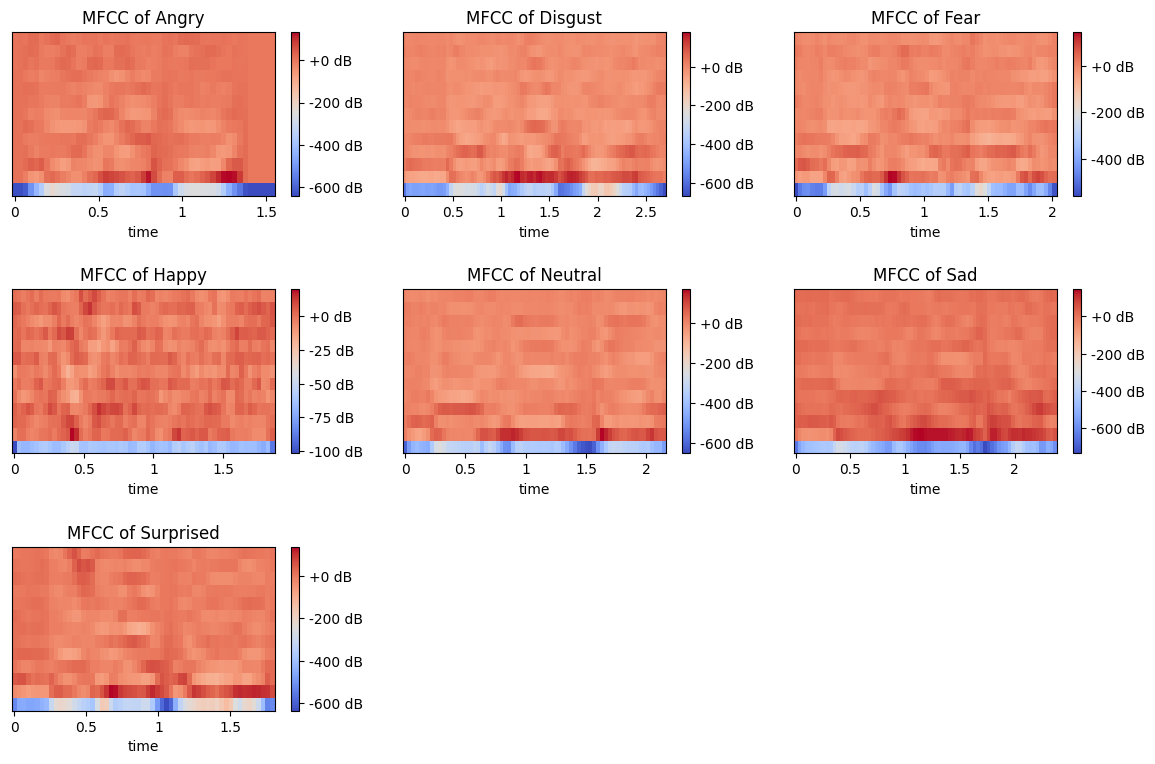

In [126]:
plt.figure(figsize=(12,8))
for i in range(7):
    data,sr=librosa.load(path=os.path.join(dataset_path,emotions_list[i],filenames[i]),sr=16000)
    mfcc=librosa.feature.mfcc(y=data,sr=sr,n_mfcc=13)
    plt.subplot(3,3,i+1)
    plt.title(f"MFCC of {emotions_list[i]}")
    librosa.display.specshow(mfcc,sr=sr,x_axis='time')
    plt.colorbar(format='%+2.0f dB')

    plt.xlabel('time')
plt.tight_layout(pad=2)
plt.show()